In [83]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split , RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report , roc_curve , auc
import xgboost as xgb
import lightgbm as lgb


In [84]:
# Loading the dataset into pandas dataframes for both train and test
train_data = pd.read_csv(f"C:\\Users\\OMID\\Desktop\\Titanic\\train (2).csv")
test_data = pd.read_csv(f"C:\\Users\\OMID\\Desktop\\Titanic\\test (1).csv")

In [85]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [86]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [87]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [88]:
# --- Preprocessing: Handling missing values ---
imputer_age = SimpleImputer(strategy="mean")
imputer_embarked = SimpleImputer(strategy="most_frequent")
imputer_fare = SimpleImputer(strategy="mean")

# ============================
#           TRAIN
# ============================

# --- Impute ---
train_data["Age"] = imputer_age.fit_transform(train_data[["Age"]]).flatten()
train_data["Fare"] = imputer_fare.fit_transform(train_data[["Fare"]]).flatten()
train_data["Embarked"] = imputer_embarked.fit_transform(train_data[["Embarked"]]).flatten()

# --- Encode  ---
train_data["Sex"] = train_data["Sex"].map({"male": 0, "female": 1})
train_data["Embarked"] = train_data["Embarked"].map({"S": 0, "C": 1, "Q": 2})

# --- Feature Engineering ---
train_data["Age_Pclass"] = train_data["Age"] * train_data["Pclass"]
train_data["FamilySize"] = train_data["SibSp"] + train_data["Parch"] + 1
train_data["Title"] = train_data["Name"].apply(lambda x: x.split(",")[1].split(".")[0].strip())


# ============================
#           TEST
# ============================

# --- Impute ---
test_data["Age"] = imputer_age.transform(test_data[["Age"]]).flatten()
test_data["Fare"] = imputer_fare.transform(test_data[["Fare"]]).flatten()
test_data["Embarked"] = imputer_embarked.transform(test_data[["Embarked"]]).flatten()

# --- Encode  ---
test_data["Sex"] = test_data["Sex"].map({"male": 0, "female": 1})
test_data["Embarked"] = test_data["Embarked"].map({"S": 0, "C": 1, "Q": 2})

# --- Feature Engineering ---
test_data["Age_Pclass"] = test_data["Age"] * test_data["Pclass"]
test_data["FamilySize"] = test_data["SibSp"] + test_data["Parch"] + 1
test_data["Title"] = test_data["Name"].apply(lambda x: x.split(",")[1].split(".")[0].strip())


In [89]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Pclass,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,66.0,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,38.0,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,78.0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,35.0,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,105.0,1,Mr


In [90]:
# Preparing the feature set (X) and target (Y)
X = np.array(train_data[["Pclass" , "Sex" , "Age" , "SibSp" , "Parch" , "Fare" , "Embarked" , "Age_Pclass" , "FamilySize"]])
Y = np.array((train_data["Survived"]))

In [91]:
# Splitting the data into training and test sets
X_train , X_test , Y_train , Y_test = train_test_split(X ,Y , test_size=0.2 , random_state=42)

running GridSearchCV for random_forest...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
best_params for random_forest : 
 {'n_estimators': 300, 'min_samples_split': 10, 'max_depth': 10}
best_score for random_forest : 
 0.8286
running GridSearchCV for logistic_regression...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
best_params for logistic_regression : 
 {'solver': 'lbfgs', 'penalty': 'l2', 'C': 10}
best_score for logistic_regression : 
 0.7935
running GridSearchCV for gradient_boosting...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\OMID\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:324: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\OMID\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\OMID\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1

best_params for gradient_boosting : 
 {'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01}
best_score for gradient_boosting : 
 0.8342
running GridSearchCV for xgboost...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
best_params for xgboost : 
 {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.2}
best_score for xgboost : 
 0.8286
running GridSearchCV for lightgbm...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000298 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 290
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score 

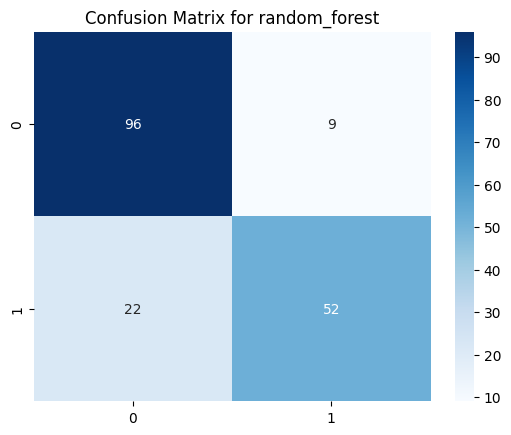

AUC for random_forest: 0.8085


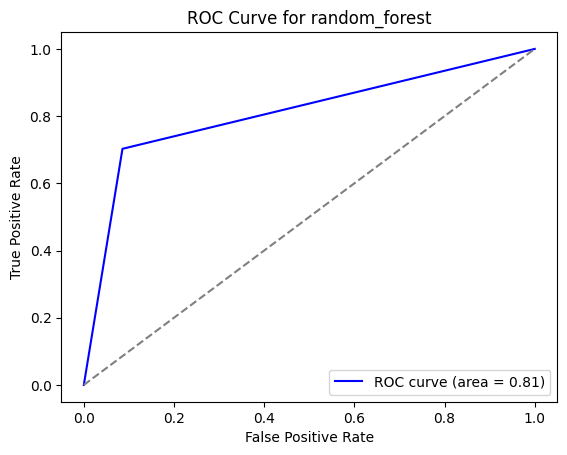

Accuracy of best logistic_regression on test data: 0.7989
Classification report for logistic_regression:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



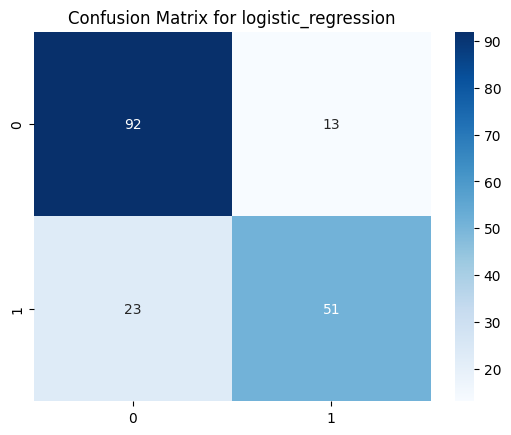

AUC for logistic_regression: 0.7827


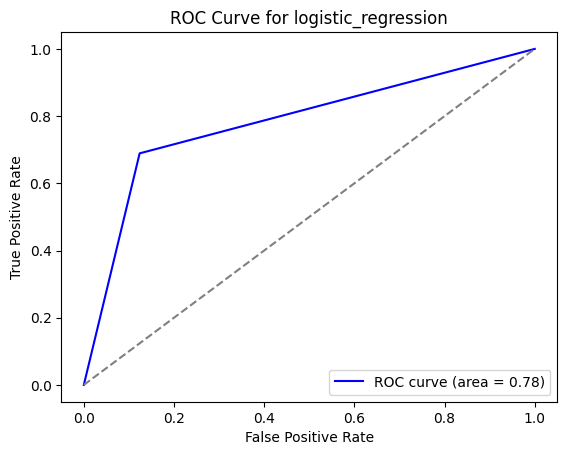

Accuracy of best gradient_boosting on test data: 0.8156
Classification report for gradient_boosting:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.84      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179



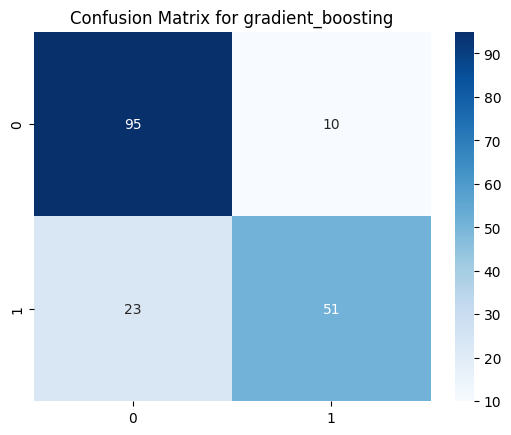

AUC for gradient_boosting: 0.7970


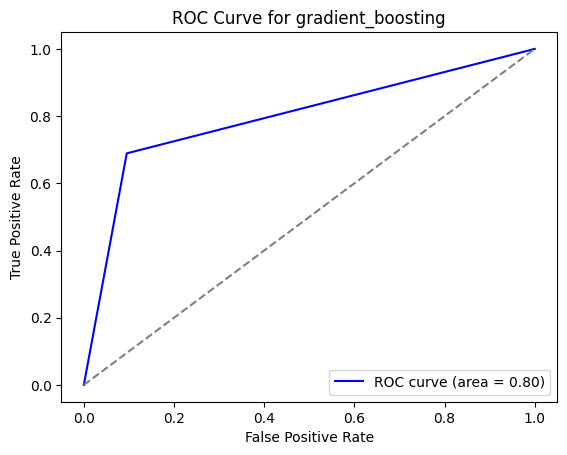

Accuracy of best xgboost on test data: 0.8324
Classification report for xgboost:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86       105
           1       0.82      0.76      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



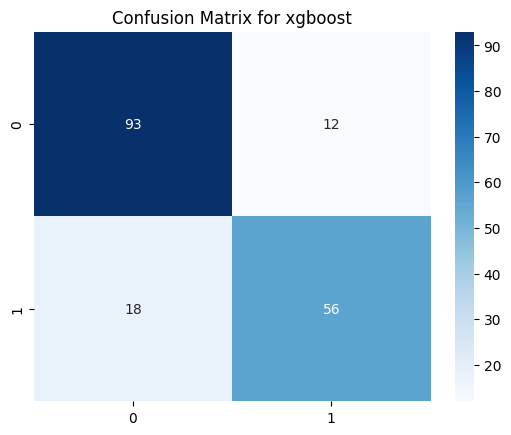

AUC for xgboost: 0.8212


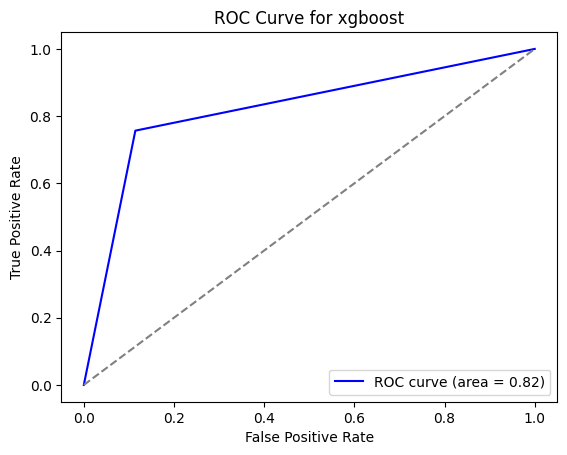

Accuracy of best lightgbm on test data: 0.8380
Classification report for lightgbm:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87       105
           1       0.84      0.76      0.79        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



c:\Users\OMID\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


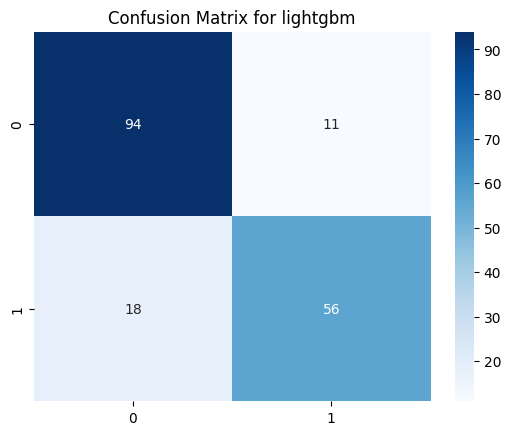

AUC for lightgbm: 0.8260


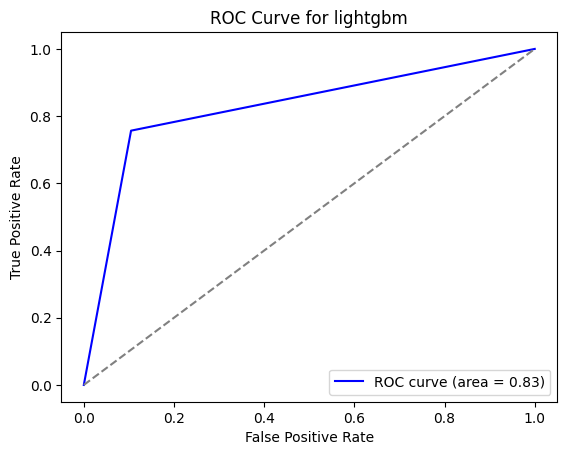

In [92]:
# Defining the models to be tested
models = {
    "random_forest" : RandomForestClassifier(random_state=42) ,
    "logistic_regression" : LogisticRegression(random_state=42) ,
    "gradient_boosting" : GradientBoostingClassifier(random_state=42),
    "xgboost" : xgb.XGBClassifier(random_state=42) ,
    "lightgbm" : lgb.LGBMClassifier(random_state=42)
}

# Defining parameter grids for tuning the models
param_grid_rf = {
    "n_estimators" : [100 , 200 , 300] ,
    "max_depth" : [None , 10 , 20] ,
    "min_samples_split" : [2 , 5 , 10]
}

param_grid_lr={
    "C":[0.1 , 1 , 10] ,
    "penalty" : ["l2"] ,
    "solver" : ["lbfgs"],
}
param_grid_gb = {
    "n_estimators" : [500 , 100 , 200] ,
    "learning_rate" : [0.01 , 0.1 , 0.2] ,
    "max_depth" : [3 , 4 , 5]
}

param_grid_xgb = {
    "n_estimators" : [100 , 200 , 300] ,
    "max_depth" : [3 , 6 , 10],
    "learning_rate" : [0.01 , 0.1 , 0.2] ,
}

param_grid_lgb = {
    "n_estimators" : [100 , 200 , 300] ,
    "learning_rate" : [0.01 , 0.1 , 0.2] ,
    "max_depth" : [3 , 4 , 5]
}

param_grids = {
    "random_forest" : param_grid_rf ,
    "logistic_regression" : param_grid_lr ,
    "gradient_boosting" : param_grid_gb ,
    "xgboost" : param_grid_xgb ,
    "lightgbm" : param_grid_lgb
}

# Store the best models after tuning
best_models = {}

# Tuning each model using RandomizedSearchCV
for model_name , model in models.items():
    print(f"running GridSearchCV for {model_name}...")

    # crating GridSearchCV
    param_grid = param_grids[model_name]

    
    grid_search = RandomizedSearchCV(estimator = model , param_distributions=  param_grid , n_iter = 10 ,cv=5 , scoring="accuracy" ,n_jobs=-1 ,verbose=2 )
    grid_search.fit(X_train , Y_train)

    # save best model
    best_models[model_name] = grid_search.best_estimator_
    print(f"best_params for {model_name} : \n {grid_search.best_params_}")
    print(f"best_score for {model_name} : \n {grid_search.best_score_:.4f}")

# Evaluating the performance of each best model on the test set
for model_name, best_model in best_models.items():
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    print(f"Accuracy of best {model_name} on test data: {accuracy:.4f}")

    print(f"Classification report for {model_name}:\n {classification_report(Y_test, y_pred)}")
    # Plot confusion matrix
    cm = confusion_matrix(Y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

    # ROC and AUC
    fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    print(f"AUC for {model_name}: {roc_auc:.4f}")

    # Plot ROC curve
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()
    

In [93]:
# Final prediction using the best model (RandomForestClassifier)
final_model = best_models["random_forest"]
X_test_final = np.array(test_data[["Pclass" , "Sex" , "Age" , "SibSp" , "Parch" , "Fare" , "Embarked" , "Age_Pclass" , "FamilySize"]])
test_data["Survived"] = final_model.predict(X_test_final)

# Save the final prediction to a CSV file
test_data[["PassengerId" , "Survived"]].to_csv("submission.csv" , index=False)